## 实现逻辑回归

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

iris = datasets.load_iris()

In [2]:
X = iris.data
y = iris.target

In [3]:
X = X[y<2,:2] # 为了可视化方便
y = y[y<2]

In [4]:
X.shape

(100, 2)

In [5]:
y.shape

(100,)

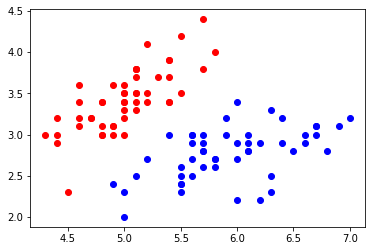

In [6]:
plt.scatter(X[y==0,0], X[y==0,1], color="red")
plt.scatter(X[y==1,0], X[y==1,1], color="blue")
plt.show()

## 使用逻辑回归

In [7]:
def train_test_split(X, y, test_ratio=0.2, seed=None):
    """将数据 X 和 y 按照test_ratio分割成X_train, X_test, y_train, y_test"""
    assert X.shape[0] == y.shape[0], \
        "the size of X must be equal to the size of y"
    assert 0.0 <= test_ratio <= 1.0, \
        "test_ration must be valid"

    if seed:
        np.random.seed(seed)

    shuffled_indexes = np.random.permutation(len(X))

    test_size = int(len(X) * test_ratio)
    test_indexes = shuffled_indexes[:test_size]
    train_indexes = shuffled_indexes[test_size:]

    X_train = X[train_indexes]
    y_train = y[train_indexes]

    X_test = X[test_indexes]
    y_test = y[test_indexes]

    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = train_test_split(X, y, seed=666)

In [8]:
from lib.LogisticRegression import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [9]:
log_reg.score(X_test, y_test)

1.0

In [10]:
log_reg.predict_proba(X_test)

array([0.92972035, 0.98664939, 0.14852024, 0.01685947, 0.0369836 ,
       0.0186637 , 0.04936918, 0.99669244, 0.97993941, 0.74524655,
       0.04473194, 0.00339285, 0.26131273, 0.0369836 , 0.84192923,
       0.79892262, 0.82890209, 0.32358166, 0.06535323, 0.20735334])

In [11]:
log_reg.predict(X_test)

array([1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0])

In [12]:
y_test

array([1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0])